In [1]:
import torch.nn as nn # importing torch.nn as nn

In [2]:
!pip install torch torchvision #installing torchvision package

In [3]:
import torch # importing torch
from torchvision import datasets # importing datasets from torchvision
from torchvision.transforms import ToTensor, Lambda #importing ToTensor and Lambda
from torch.utils.data import Dataset, random_split

In [4]:
import pandas as pd

In [5]:
import torch # importing torch
from torchvision import datasets # importing datasets from torchvision
from torchvision.transforms import ToTensor, Lambda #importing ToTensor and Lambda

ds_train = datasets.CIFAR10(  # Getting dataset (training) from FashionMNIST
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(), # this converts the image into a tensor
    target_transform= Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y), value=1))
    # This creates a tensor of zeros with a shape of (10,), indicating that there are 10 possible classes or labels. The dtype is set to float.
)

test_dataset = datasets.CIFAR10(  # Getting dataset (testing) from FashionMNIST
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(), # this converts the image into a tensor
    target_transform= Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y), value=1))
    # This creates a tensor of zeros with a shape of (10,), indicating that there are 10 possible classes or labels. The dtype is set to float.
)

100%|██████████| 170498071/170498071 [00:01<00:00, 101124432.78it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [6]:
# this chunk is used to get the validation datset from the training dataset
from torch.utils.data import random_split # importing random_split


train_size = len(ds_train) # taking length of the training set
val_size = int(0.1 * train_size)  # Taking 10% of the training set for validation

train_dataset, val_dataset = random_split(ds_train, [train_size - val_size, val_size]) # seperating into 90% of training into new training and 10% of training to validation

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")


Training set size: 45000
Validation set size: 5000


In [7]:
print(f"Test set size: {len(test_dataset)}")

Test set size: 10000


## Defining the Network Architecture

In [8]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(3,32,3,1),
        nn.BatchNorm2d(32),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2,2),
        nn.Conv2d(32,64,3,1),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.25),
    )
    self.block2 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(2304,128),
        nn.BatchNorm1d(128),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(128,10),
        nn.BatchNorm1d(10)
    )

  def forward(self,x):
    x = self.block1(x)
    return self.block2(x)

In [9]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [10]:
net = Net().to(device)
print(net)

Net(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout(p=0.25, inplace=False)
  )
  (block2): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2304, out_features=128, bias=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=128, out_features=10, bias=True)
    (6): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True

In [11]:
import torch.optim as optim #importing optim

In [12]:
criterion = nn.CrossEntropyLoss()  # Taking Cross Entropy Loss as the Loss function
optimizer = optim.Adam(net.parameters(), lr=1e-4)  # optimizer is SGD stochastic gradient descent


# Creating DataLoaders

In [13]:
from torch.utils.data import DataLoader # importing dataloader

In [14]:
# loading all the datasets into dataloader for feeding into the model by batches

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Printing the image

In [15]:
train_features,train_labels = next(iter(train_loader))

In [16]:
train_features[0].shape

torch.Size([3, 32, 32])

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64, 10])


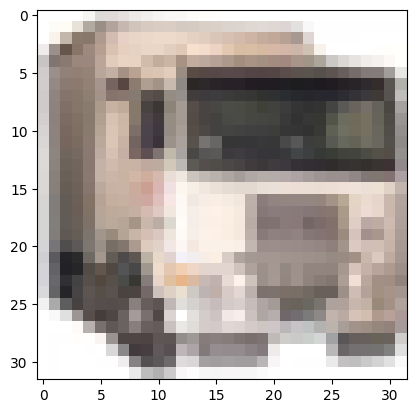

Label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


In [17]:
import matplotlib.pyplot as plt


print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Select the first image from the batch
img = train_features[0].squeeze().permute(1, 2, 0)
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


In [18]:
import torchvision

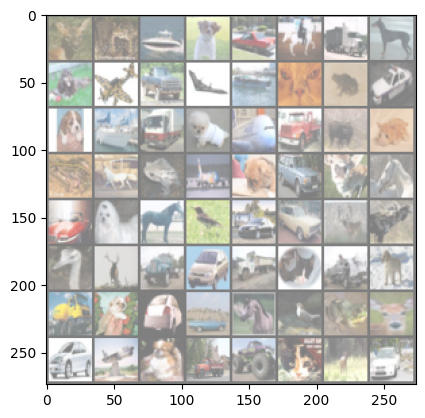

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))


## Training and Validating the Model

In [20]:
def trainval_loop(train_loader, val_loader, net, criterion, optimizer): #parameters for the function
    # Set the model to training mode before entering loops
    net.train()

    # Training loop
    size = len(train_loader.dataset)
    ret_train_loss = []
    ret_val_loss = []

    for batch, (X, y) in enumerate(train_loader):
        # Compute prediction and loss (training)
        X,y = X.to(device), y.to(device)
        pred = net(X)
        loss = criterion(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # this is done to deny the involement of the previous gradients interference with the current ones

        if batch % 100 == 0:
            current = batch * len(X)
            print(f"Training loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]") #printing training loss
            ret_train_loss.append(loss.item())
    # Set the model to evaluation mode before validation
    net.eval()

    # Validation loop

    val_loss = 0
    val_size = len(val_loader.dataset)
    with torch.no_grad():  # No need to compute gradients during validation
        for batch, (X, y) in enumerate(val_loader):
            # Compute prediction and loss
            X,y = X.to(device), y.to(device)
            pred = net(X)
            loss = criterion(pred, y)
            val_loss += loss.item()


            if batch % 100 == 0:
                current = batch * len(X)
                print(f"Validation loss: {loss.item():>7f}  [{current:>5d}/{val_size:>5d}]") #printing validation loss
                ret_val_loss.append(loss.item())
    avg_val_loss = val_loss / len(val_loader)
    print(f"Avg. Validation loss: {avg_val_loss:>7f}") #printing average validation loss

    a = float(sum(ret_train_loss)/len(ret_train_loss))
    b = float(sum(ret_val_loss)/len(ret_val_loss))
    return a,b


## Testing the Model

In [62]:
# this chunk is important for testing the model
def test_loop(test_loader, net, criterion): # function test_loop taking these respective parameters
    net.eval() # setting the model to eval
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0
    #confusion_matrix = np.zeros((10,10), dtype=np.int32)

    with torch.no_grad():
        for X, y in test_loader:
            X,y = X.to(device), y.to(device)
            pred = net(X)
            test_loss += criterion(pred, y).item()

            # Calculate the number of correct predictions in this batch
            pred_labels = pred.argmax(dim=1)
            y= y.argmax(dim=1)
            #print(pred_labels,y)
            correct += (pred_labels == y).sum().item()
            #confusion_matrix[pred_labels, y] += 1


    test_loss /= num_batches
    accuracy = correct / size
    print(f"Test Error: \n Accuracy: {(100*accuracy):.2f}%, Avg loss: {test_loss:.8f} \n") # printint the Accuracy (TEST) and the test_loss
    #return confusion_matrix

## Now Training and Validation

In [69]:
epochs = 30
epoch_loss_train = []
epoch_loss_val = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    a,b = trainval_loop(train_loader,val_loader, net, criterion, optimizer) # running train_val loop by 10 times
    epoch_loss_train.append(a)
    epoch_loss_val.append(b)
print("Done!")

Epoch 1
-------------------------------
Training loss: 0.958483  [    0/45000]
Training loss: 1.066537  [ 6400/45000]
Training loss: 1.085300  [12800/45000]
Training loss: 0.976367  [19200/45000]
Training loss: 0.976630  [25600/45000]
Training loss: 1.029466  [32000/45000]
Training loss: 0.967451  [38400/45000]
Training loss: 1.019393  [44800/45000]
Validation loss: 1.107981  [    0/ 5000]
Avg. Validation loss: 0.891622
Epoch 2
-------------------------------
Training loss: 0.970440  [    0/45000]
Training loss: 0.901264  [ 6400/45000]
Training loss: 1.092041  [12800/45000]
Training loss: 1.299842  [19200/45000]
Training loss: 0.991888  [25600/45000]
Training loss: 1.112425  [32000/45000]
Training loss: 0.949412  [38400/45000]
Training loss: 0.905418  [44800/45000]
Validation loss: 1.187305  [    0/ 5000]
Avg. Validation loss: 0.908635
Epoch 3
-------------------------------
Training loss: 1.048123  [    0/45000]
Training loss: 1.235324  [ 6400/45000]
Training loss: 0.984657  [12800/45

# We will plot losses now

In [70]:
epoch_loss_train

[1.0099532529711723,
 1.0278412029147148,
 0.9769194796681404,
 1.0246973857283592,
 0.9285794496536255,
 0.8624603003263474,
 0.9559198468923569,
 0.9532587677240372,
 0.9437088072299957,
 0.8593164160847664,
 0.810587078332901,
 0.856702633202076,
 0.8440533429384232,
 0.8646286949515343,
 0.8526266738772392,
 0.812932625412941,
 0.8851892873644829,
 0.8459057658910751,
 0.8164070546627045,
 0.7175479754805565,
 0.8167464062571526,
 0.7816014066338539,
 0.772145077586174,
 0.7116353213787079,
 0.7742313668131828,
 0.7228375673294067,
 0.7711702734231949,
 0.7868156731128693,
 0.7457385286688805,
 0.7515698298811913]

In [71]:
epoch_loss_val

[1.1079812049865723,
 1.1873054504394531,
 1.0825920104980469,
 1.0982784032821655,
 1.0560275316238403,
 1.0414998531341553,
 1.0515632629394531,
 1.0535022020339966,
 1.0177462100982666,
 1.0503673553466797,
 1.069840908050537,
 1.0387144088745117,
 1.026860237121582,
 1.0026990175247192,
 1.0261415243148804,
 0.9766992926597595,
 1.0100631713867188,
 0.9827800989151001,
 0.9361233711242676,
 0.9600299596786499,
 0.9915839433670044,
 0.9506350159645081,
 0.9206109046936035,
 0.9371020793914795,
 1.0175429582595825,
 0.9418144226074219,
 0.9535642266273499,
 0.9651014804840088,
 0.9697451591491699,
 0.9217126369476318]

In [72]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.arange(len(epoch_loss_train))

ypoints

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

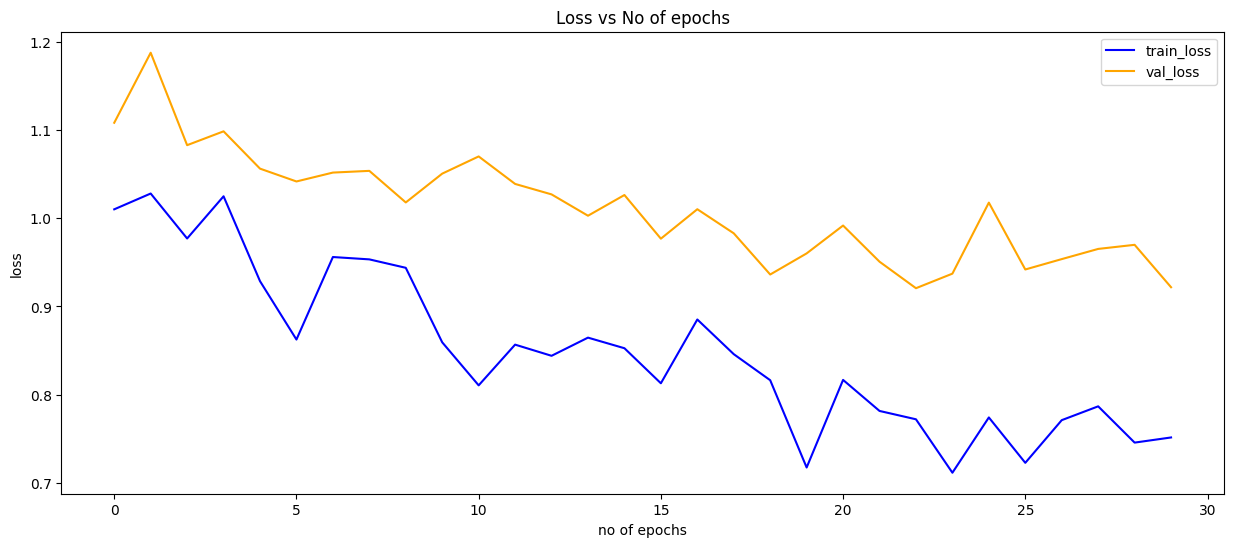

In [73]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(ypoints,epoch_loss_train, color='blue',label='Train')
plt.plot(ypoints,epoch_loss_val, color='orange',label='Validation')

plt.title("Loss vs No of epochs")
plt.xlabel("no of epochs")
plt.ylabel("loss")
plt.legend(["train_loss","val_loss"])
plt.show()

# Testing

In [74]:
test_loop(test_loader, net, criterion) #test_loop running and checking the results


Test Error: 
 Accuracy: 75.66%, Avg loss: 0.73127082 

